# Linear Regression 

### First example 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
%matplotlib inline

In [7]:
#store data into datadrame
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [8]:
df.shape

(4874, 7)

In [9]:
df.describe


<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
4869  2021-09-24  592.500000  592.979980  583.640015  592.390015  592.390015   
4870  2021-09-27  587.950012  593.580017  576.929993  592.640015  592.640015   
4871  2021-09-28  589.000000  599.539978  580.159973  583.849976  583.849976   
4872  2021-09-29  589.010010  609.880005  588.010010  599.059998  599.059998   
4873  2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   

     

In [10]:
df.notnull

<bound method DataFrame.notnull of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
4869  2021-09-24  592.500000  592.979980  583.640015  592.390015  592.390015   
4870  2021-09-27  587.950012  593.580017  576.929993  592.640015  592.640015   
4871  2021-09-28  589.000000  599.539978  580.159973  583.849976  583.849976   
4872  2021-09-29  589.010010  609.880005  588.010010  599.059998  599.059998   
4873  2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   

    

In [11]:
pd.DatetimeIndex(df['Date']).month

Int64Index([5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=4874)

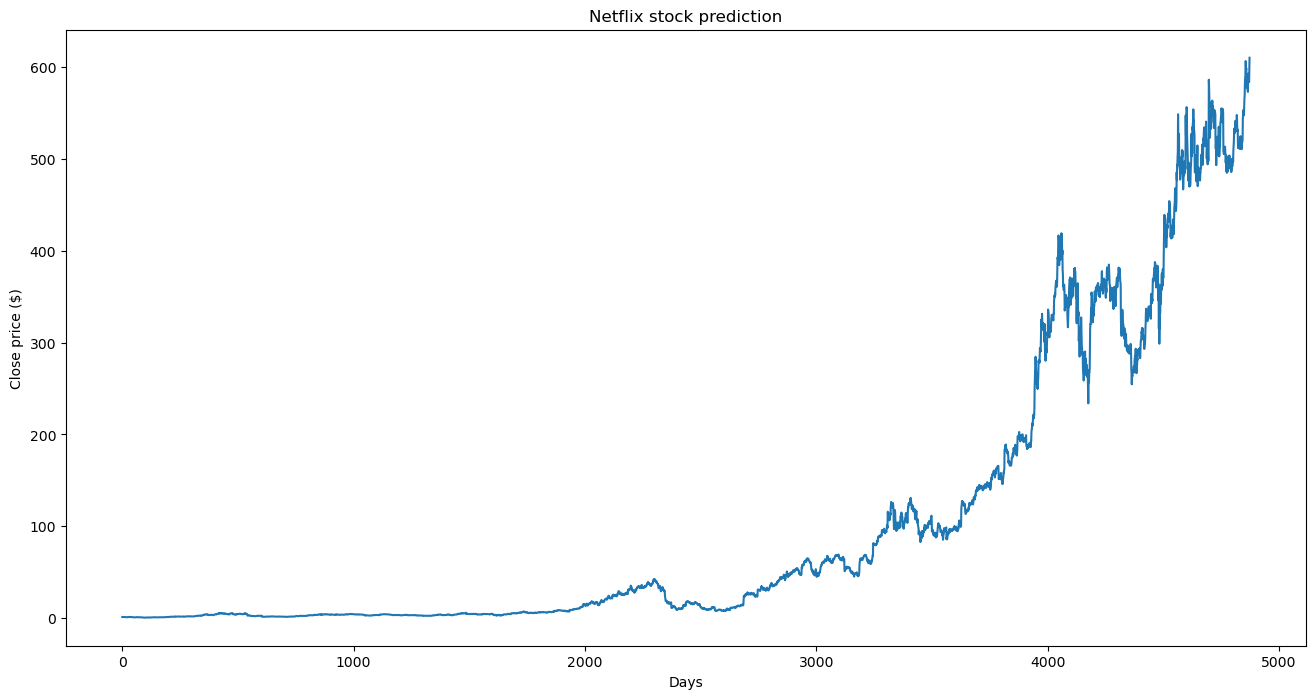

In [12]:
#Closing price generally refers to the last price at which a stock trades during a regular trading session
plt.figure(figsize=(16,8))
plt.title('Netflix stock prediction')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df.Close)

<AxesSubplot:xlabel='Date', ylabel='Close'>

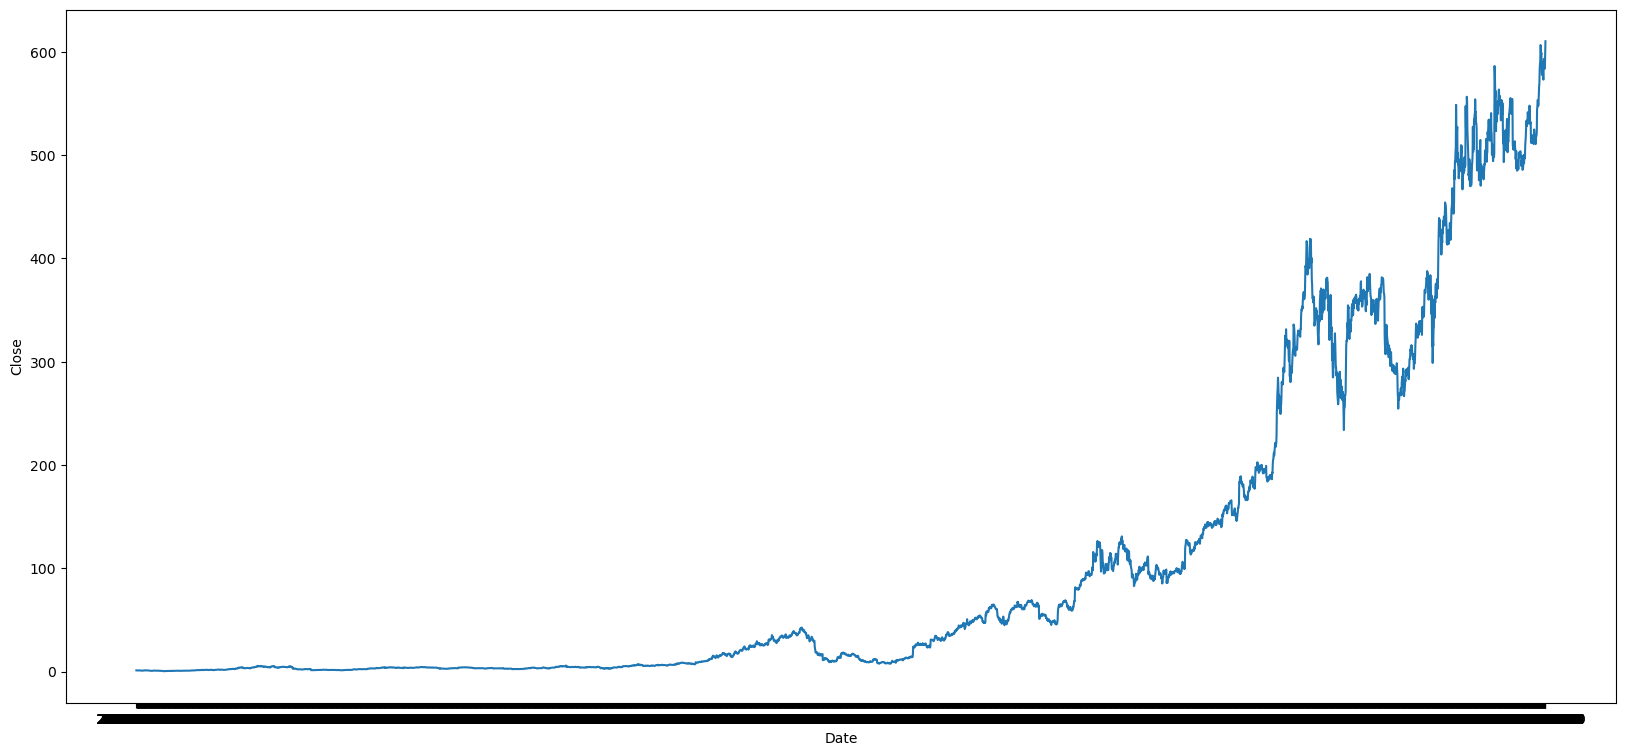

In [13]:
#use lineplot to show the growth of price by date
#df['Date'] = pd.to_datetime(df.Date)
pd.DatetimeIndex(df['Date']).month
plt.figure(figsize=(20,9))
sns.lineplot(data=df,x=df.Date,y=df.Close)

/tmp/ipykernel_68762/3518335640.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, '')]

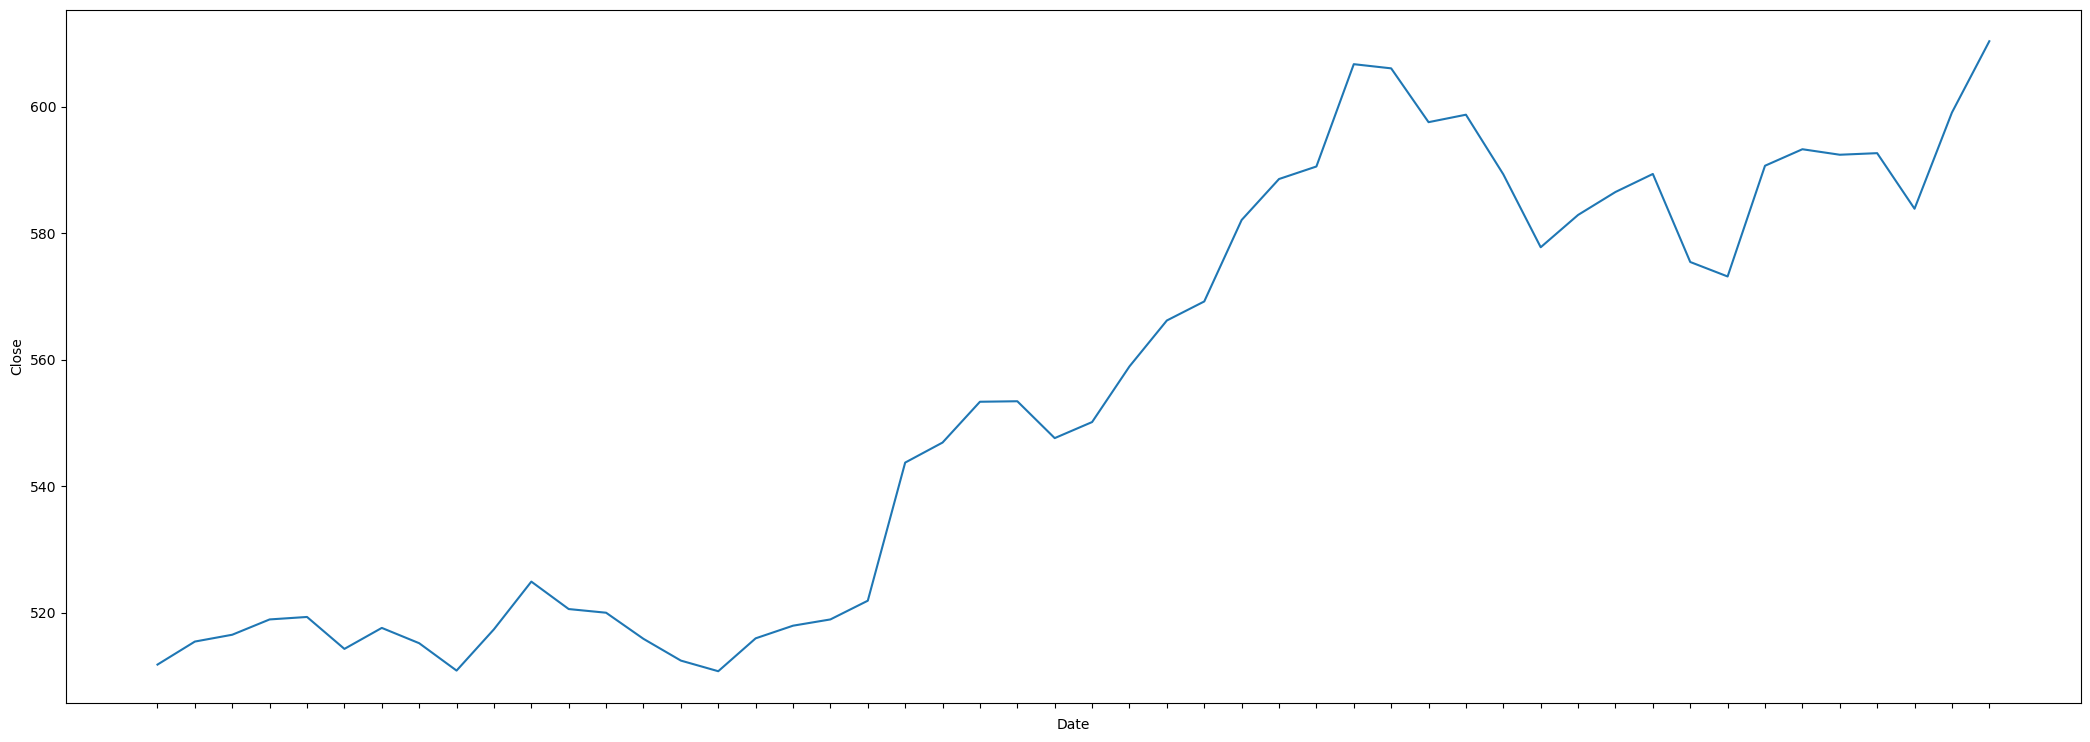

In [14]:
#https://www.absentdata.com/python-graphs/seaborn-line-chart/
plt.figure(figsize=(26,9)) 
df  = df.tail(50)
chart = sns.lineplot(data = df, x='Date',y='Close',err_style='bars',palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [15]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
x = df[['Open', 'High', 'Volume']]

In [20]:
y = df['Close']

In [21]:
model = LinearRegression()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data

LinearRegression()

In [23]:
predicted=model.predict(x_test) #testing our model’s performance
print("R squared", metrics.r2_score(y_test,predicted))

R squared 0.9907154838946854


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures 
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 5)

In [26]:
x_=poly.fit_transform(x)

In [27]:
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:              Open        High   Volume
4824  510.209991  513.679993  4328100
4825  512.159973  517.409973  3820500
4826  514.380005  521.130005  2254500
4827  518.080017  521.950012  2759000
4828  521.820007  524.469971  2390500
4829  519.960022  520.780029  1736000
4830  512.690002  519.789978  2534900
4831  519.000000  519.849976  2096600
4832  514.390015  515.630005  2579400
4833  513.000000  517.979980  2039400
4834  517.130005  525.409973  2556700
4835  524.000000  526.840027  1919400
4836  521.150024  522.669983  1367800
4837  520.000000  520.789978  1960500
4838  517.000000  519.570007  1673900
4839  511.859985  513.000000  1685700
4840  512.640015  521.440002  2176300
4841  515.239990  523.380005  2032800
4842  515.469971  520.789978  2309800
4843  520.000000  526.380005  2582000
4844  522.739990  548.390015  7497300
4845  545.090027  551.390015  3774300
4846  545.979980  555.549988  2602000
4847  551.479980  555.309998  2109500
4848  550.159973  552.84

LinearRegression()

In [36]:
df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [57]:
#checking the keys
#df=load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [53]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [56]:
#
raw_df.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')